**TASK # 1 : Exploring and Visualizing the Iris Dataset**

1. Load the dataset using the pandas library.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Enable inline plotting for Jupyter Notebook
%matplotlib inline


2. Display dataset structure using .shape, .columns, and .head().

In [2]:
# Load Iris Dataset
df = sns.load_dataset("iris")

# Display first few rows
df.head()
# check dataset shape
df.shape
#list columns
df.columns
#show basic statistical summary
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


3. Create basic visualizations: 
 
○ Scatter plot to analyze relationships between variables. 
 
○ Histogram to examine data distribution. 
 
○ Box plot to detect outliers and spread of values. 
 
●	Use matplotlib and seaborn for visualizations. 


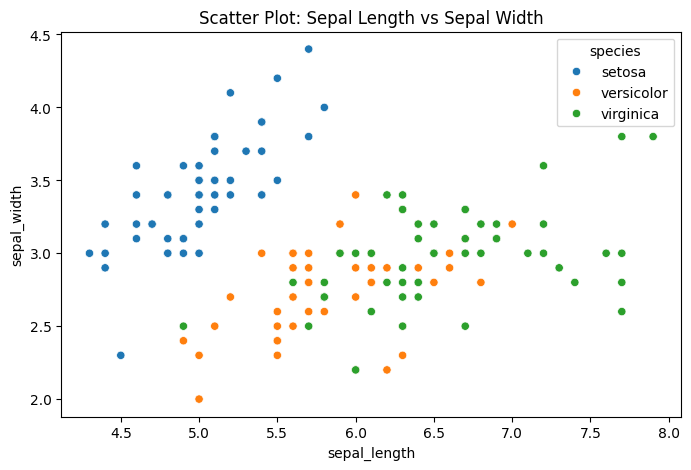

In [3]:
# Scatter plot
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df,
    x="sepal_length",
    y="sepal_width",
    hue="species"
)
plt.title("Scatter Plot: Sepal Length vs Sepal Width")
plt.show()


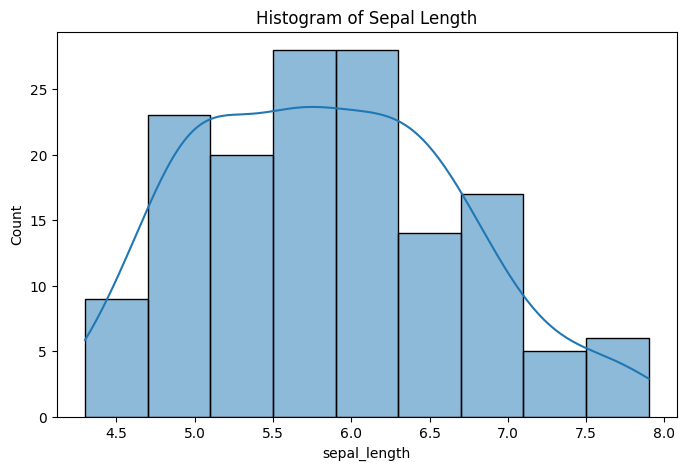

In [4]:
# Histogram
plt.figure(figsize=(8,5))
sns.histplot(
    df["sepal_length"],
    kde=True
)
plt.title("Histogram of Sepal Length")
plt.show()


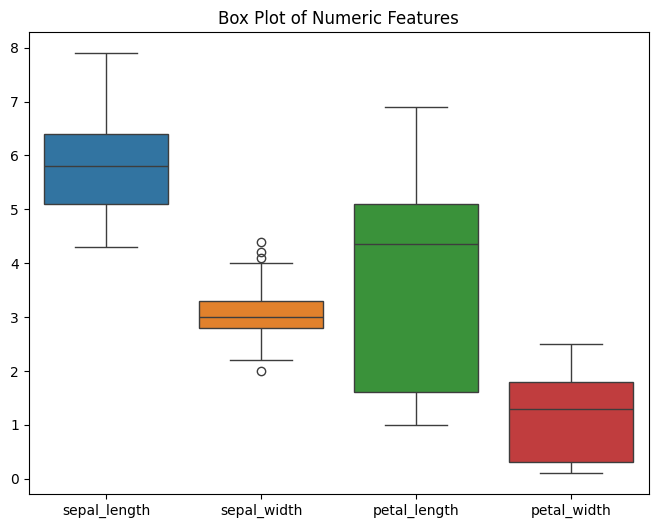

In [5]:
# Boxplot
plt.figure(figsize=(8,6))
sns.boxplot(data=df)
plt.title("Box Plot of Numeric Features")
plt.show()


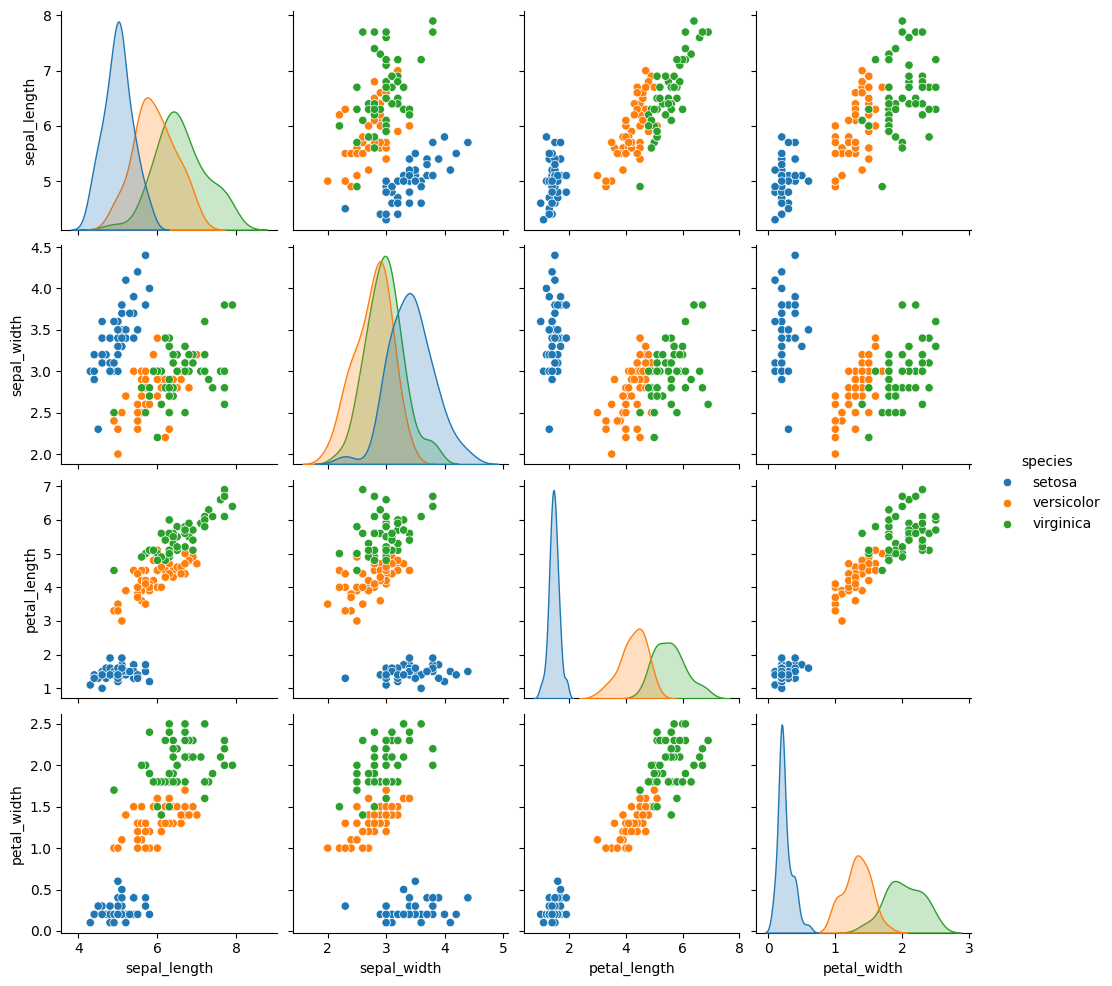

In [6]:
# Pair plot
sns.pairplot(df, hue="species")
plt.show()


**TASK # 2 : Credit Risk Prediction (Loan Default Classification)**

1. Basic Dataset Inspection

In [10]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

%matplotlib inline

# Load dataset
url = "https://raw.githubusercontent.com/dphi-official/Datasets/master/Loan_Data/loan_train.csv"
df = pd.read_csv(url)
df.head()

df.shape
df.info()
df.describe()

# handling missing values
df.isnull().sum()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

# Encode categorical variables
le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         491 non-null    int64  
 1   Loan_ID            491 non-null    object 
 2   Gender             481 non-null    object 
 3   Married            490 non-null    object 
 4   Dependents         482 non-null    object 
 5   Education          491 non-null    object 
 6   Self_Employed      462 non-null    object 
 7   ApplicantIncome    491 non-null    int64  
 8   CoapplicantIncome  491 non-null    float64
 9   LoanAmount         475 non-null    float64
 10  Loan_Amount_Term   478 non-null    float64
 11  Credit_History     448 non-null    float64
 12  Property_Area      491 non-null    object 
 13  Loan_Status        491 non-null    int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 53.8+ KB


2.Exploratory Data Analysis (EDA)

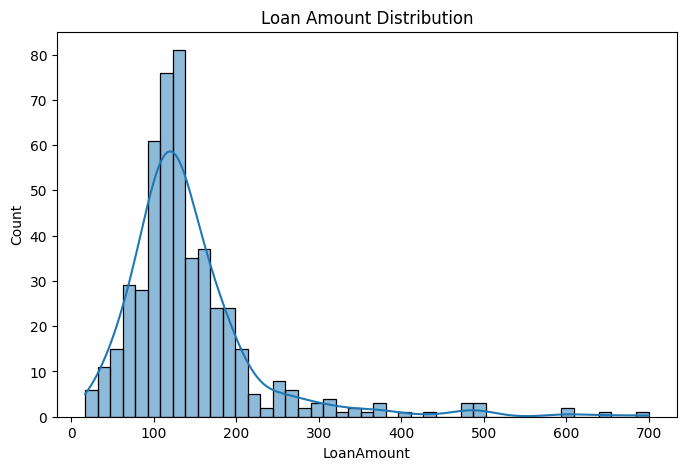

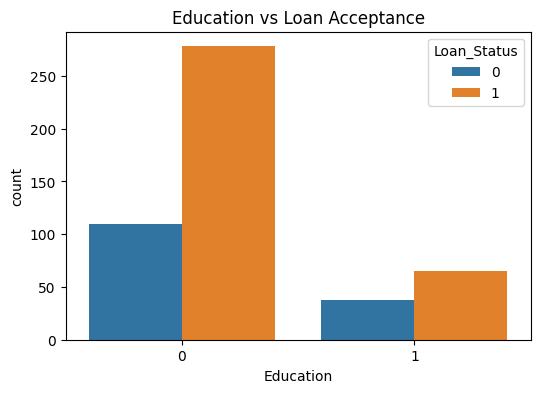

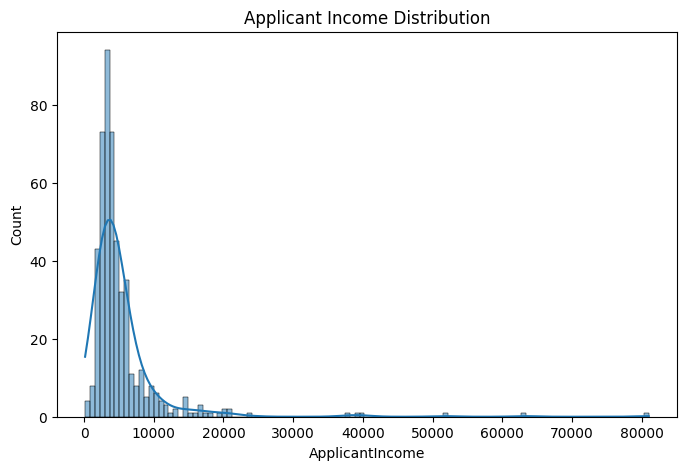

In [11]:


# Loan Amount Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['LoanAmount'], kde=True)
plt.title("Loan Amount Distribution")
plt.show()

# Education vs Loan Status
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Education', hue='Loan_Status')
plt.title("Education vs Loan Acceptance")
plt.show()

# Income Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['ApplicantIncome'], kde=True)
plt.title("Applicant Income Distribution")
plt.show()





3. Split Dataset into Train & Test Sets

In [13]:
X = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Train Logistic Regression Model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)



c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


4. Make Predictions and Model Evaluation

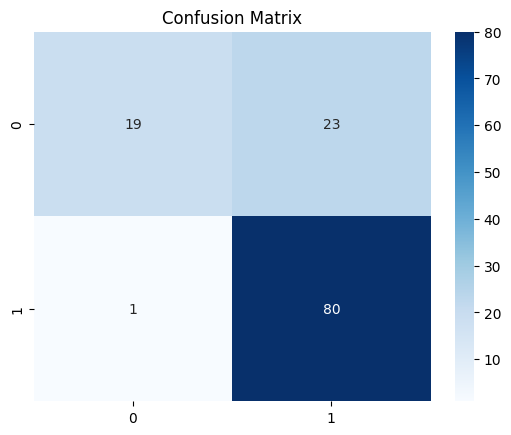

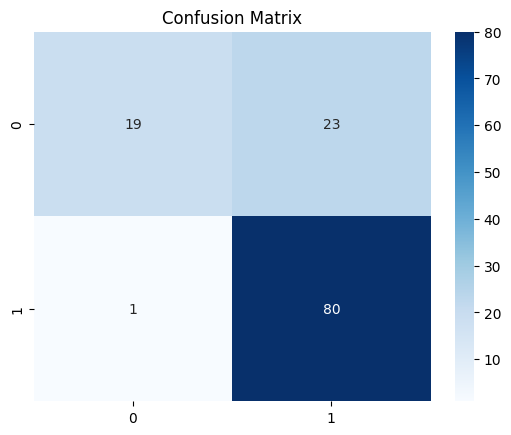

In [16]:
y_pred = model.predict(X_test)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
accuracy
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# Classification report
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.show()



*Insights from EDA showed:*

Income and loan amount significantly affect loan decision.

Education level may also impact loan approval likelihood.

**Task # 3: Customer Churn Prediction (Bank Customers)**

1. Dataset Inspection

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

%matplotlib inline
df = pd.read_csv("https://raw.githubusercontent.com/sharmaroshan/Churn-Modelling-Dataset/master/Churn_Modelling.csv")
df.head()

df.shape
df.info()
df.describe()
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis=1)
df.isnull().sum()

#df = df.fillna(df.median())
le = LabelEncoder()

df["Gender"] = le.fit_transform(df["Gender"])
df["Geography"] = le.fit_transform(df["Geography"])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


2. Exploratory Data Analysis (EDA)

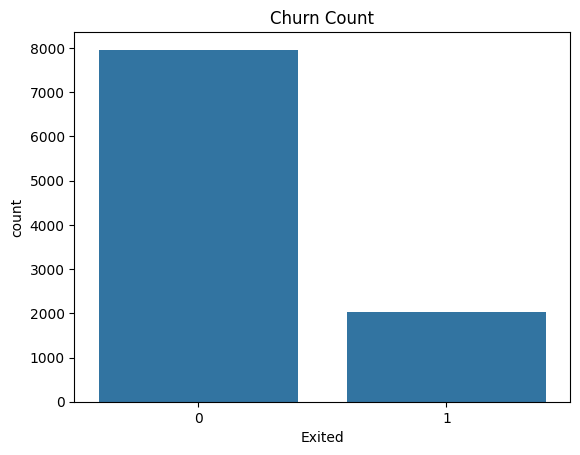

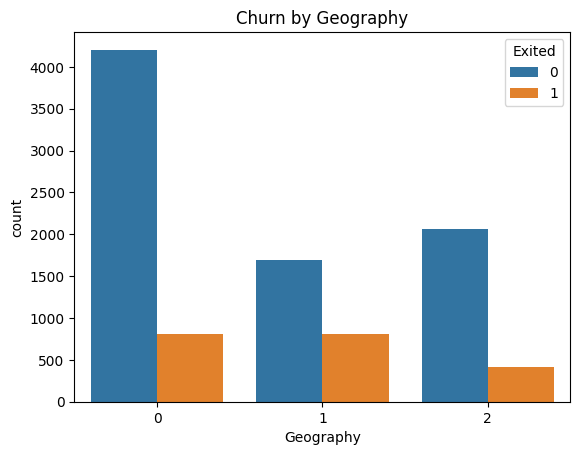

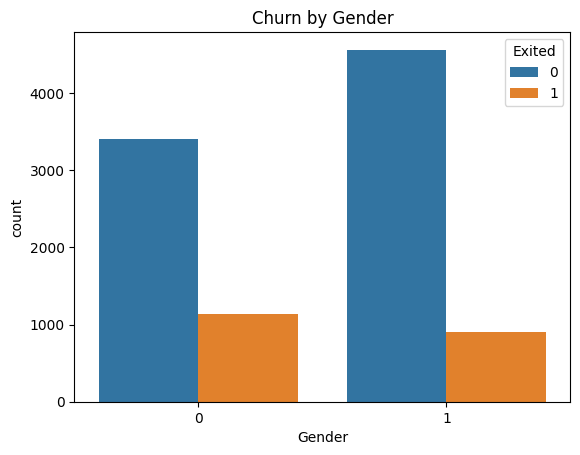

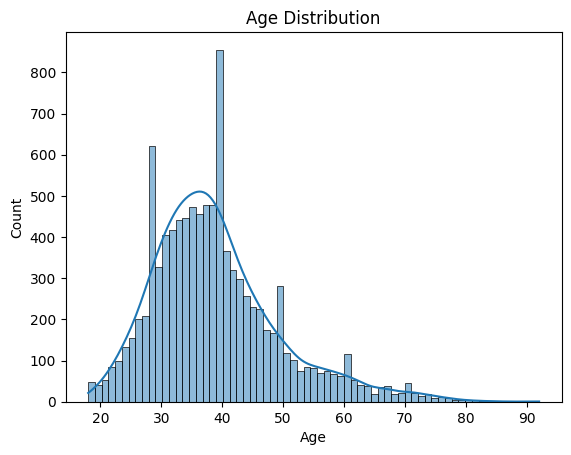

In [37]:
# Churn Count
sns.countplot(data=df, x="Exited")
plt.title("Churn Count")
plt.show()

# Geography vs Churn
sns.countplot(data=df, x="Geography", hue="Exited")
plt.title("Churn by Geography")
plt.show()

# Churn by Gender
sns.countplot(data=df, x="Gender", hue="Exited")
plt.title("Churn by Gender")
plt.show()

# Age distribution
sns.histplot(df["Age"], kde=True)
plt.title("Age Distribution")
plt.show()



3. Split Data into Train/Test Sets

In [38]:
X = df.drop("Exited", axis=1)
y = df["Exited"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Train classification model
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


4. Make Predictions and Model Evaluation

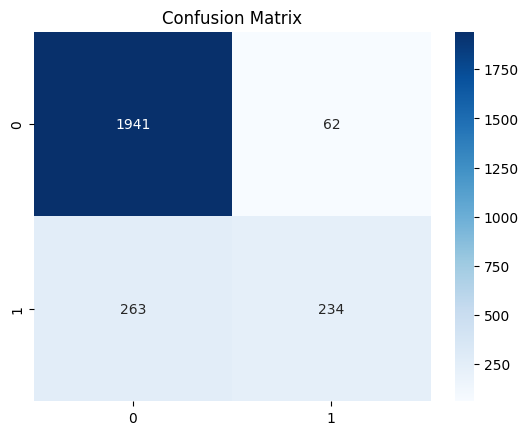

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2003
           1       0.79      0.47      0.59       497

    accuracy                           0.87      2500
   macro avg       0.84      0.72      0.76      2500
weighted avg       0.86      0.87      0.86      2500



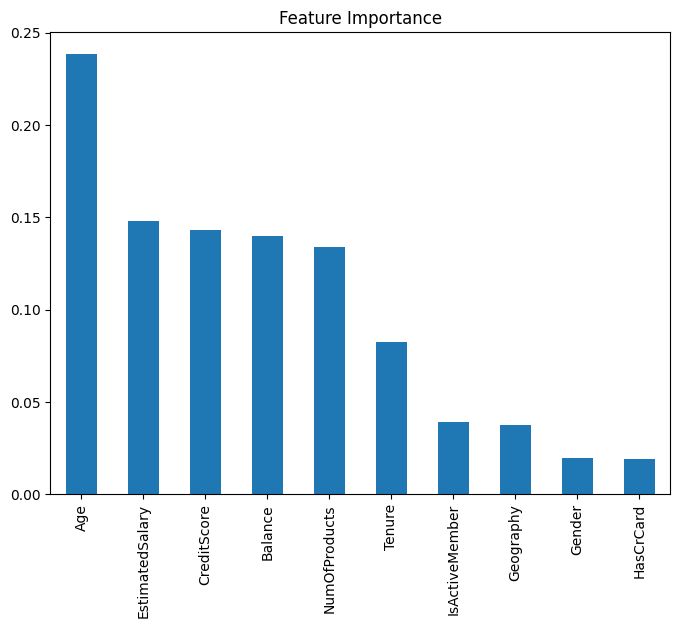

In [39]:
y_pred = model.predict(X_test)

# Accuracy 
accuracy = accuracy_score(y_test, y_pred)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# Classification report
print(classification_report(y_test, y_pred))

# Feature importance
feat_importances = pd.Series(
    model.feature_importances_, index=X.columns
).sort_values(ascending=False)

plt.figure(figsize=(8,6))
feat_importances.plot(kind='bar')
plt.title("Feature Importance")
plt.show()


